### 1. Randome Walk Process -

RWP - When there is equal chance of going up or down by a random number.

$y_t = C + y_{t-1} + e_t$

$e_t$ is the random number or the white noise. Realization of SND with variance 1 and mean 0.

if C is non-zero then this is RW with drift

### 1.1 Simulating RWP

Let's consider that C is zero, then we have

$y_t = y_{t-1} + e_t$

$y_0$ is first value of sequence which is eaual to 0.

$y_1 = y_0 + e_1 = 0 + e_1 = e_1$

$y_2 = y_1 + e_2 = e_1 + e_2$

$y_3 = y_2 + e_3 = e_1 + e_2 + e_3$

Now, we can see pattern and say that the value at time t is simplay the sum of white noise from t=0 to t=t

$y_t = \sum_{t=1}^{T} e_{t}$

At amny point in time t, the value of our simulated time series will be cumulative sum of a series of random numbers.

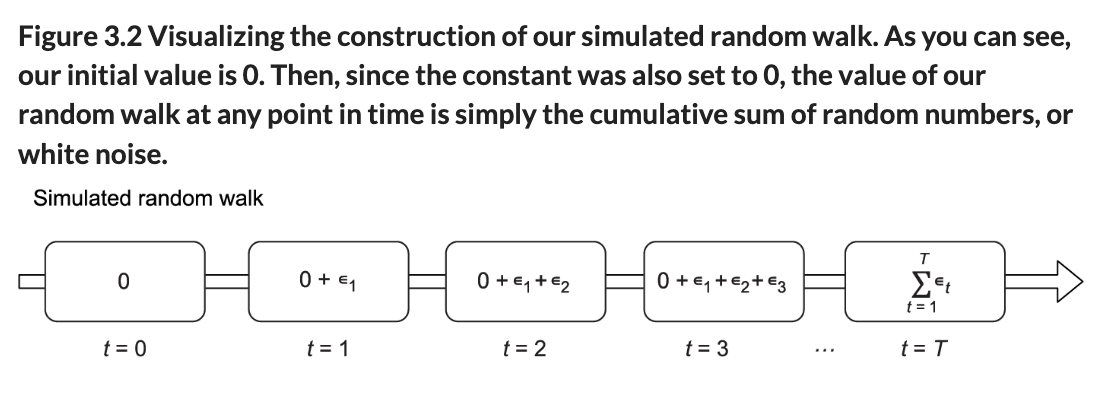

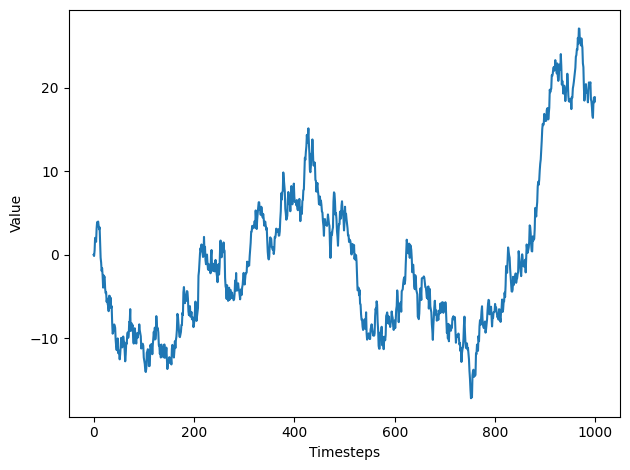

In [3]:
# generate 100 samples
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
steps = np.random.standard_normal(1000) # Draw random samples from SND
steps[0] = 0 # first value to 0

random_walk = np.cumsum(steps) # sum of whitenoise for each timestep

fig, ax = plt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
# Notice a positive trend, and followed by negative trend
# We have both, plus sudden changes and long periods where trend is observed


### 2. Identifying a random walk

A RW is a series whose first difference is stationary and uncorrelated. 

### 2.1 Stationarity

A stationarity time series is one whose statistical properties do not change over time (constant mean, variance, autocorrelation)

if data is non-stationariy, then its properties are going to change through time, this means that we can not possibly derive a function of future values as a function of past values, since coefficient change at each point in time.

To make a timeseries stationary, we do transformation, that stabilizes its means and variance. Differencing - it removes the trends or seasonal effects.(constant mean through time)

Applying log function to series can stabilize its variance

$y^{`}_{t} = y_t - y_{t-1}$

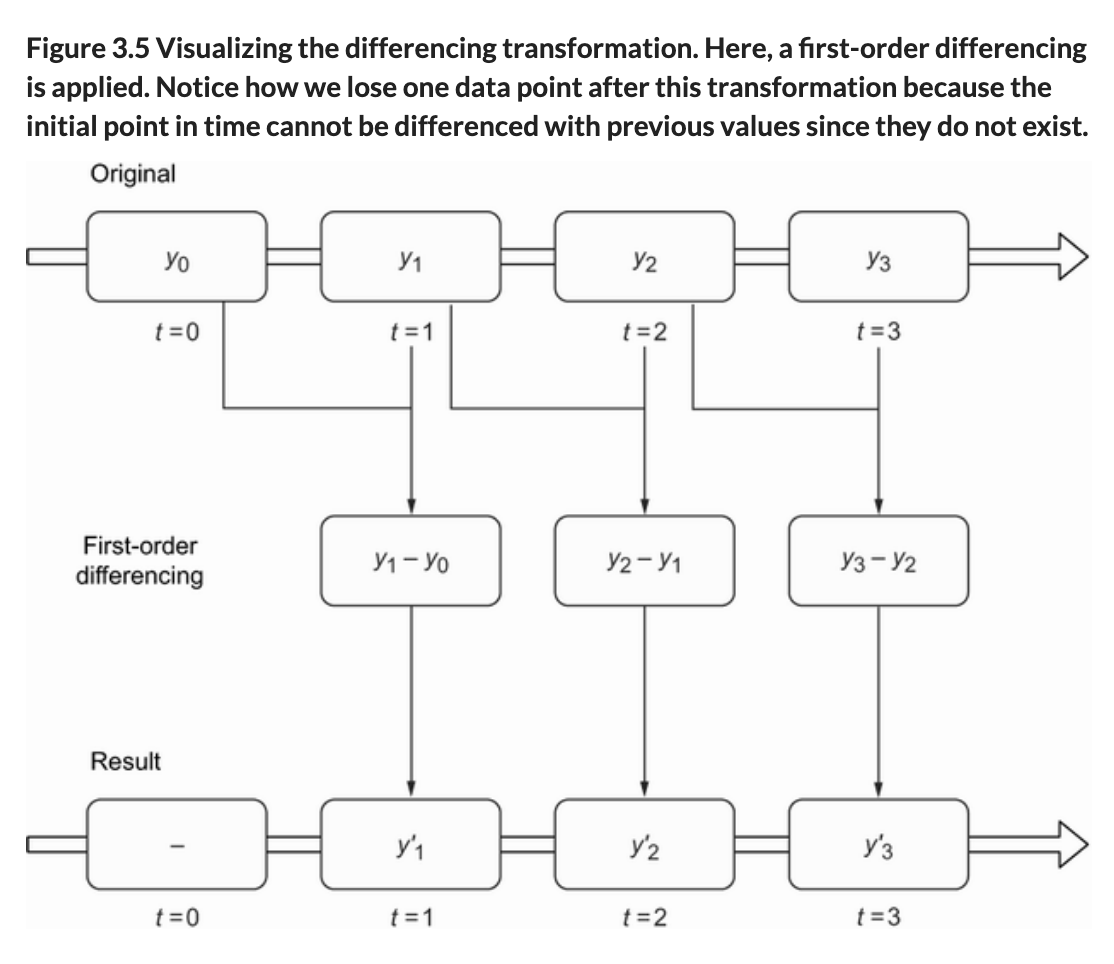

### 2.2 Testing for stationarity

To test whether we need to apply any more transformation to make TS stationarity.

ADF (Augmented Dickey-Fuller) test - By testing the presence of a unit root, if a unit root is present then TS is non-stationary

H0 : There is a unit root present in a TS
H1 : There is no unit root in TS

ADF Statistic is a negative number, the more negative it is, the stronger the rejection of null hypothesis, Also, if p-value is less that 0.05, we can reject null hypothesis and say series is stationary

$y_t = C + a_{1}.y_{t-1} + e_t$

Here, $a_{1}$ is root of the time seires, TS will be stationary if root liew within unit circle (-1, 1)

Non-stationary process has long periods of positive and negative trends. However, the stationary process does not seem to increase or decrease over the long term

### 2.3 The autocorrelation function

Autocorrelation measures the linear relationship between lagged values of a time series.

Autocorrelation coefficient between $y_t$ and $y_{t-1}$. , here lag is equal to 1 and the coefficient would be denoated as $r_1$

When we plot ACF, the coefficient would be dependent variable and lag would be independent

In [5]:
from statsmodels.tsa.stattools import adfuller

# pass array of simulated data, result is list
ADF_result = adfuller(random_walk)

print(f'ADF Statistics: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

# We can not reject H0, Hence TS is non-satationary

ADF Statistics: -0.9659524876918759
p-value: 0.7654789696692579


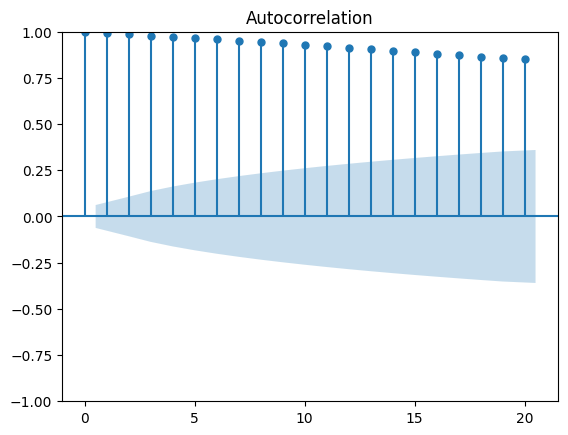

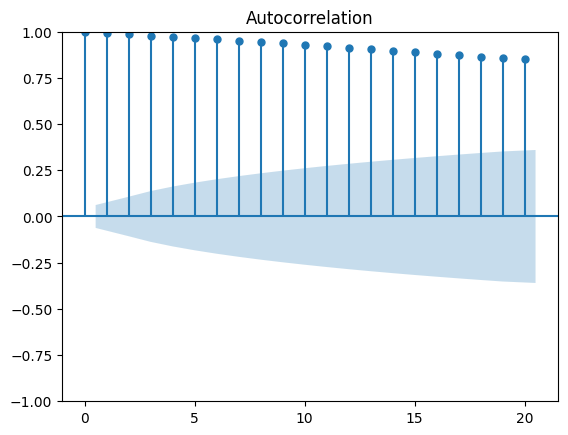

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(random_walk, lags=20)

# Shaded area tells CI, if point is within that
# it is not significantly different from 0
# Otherwise autocorrelation is significant

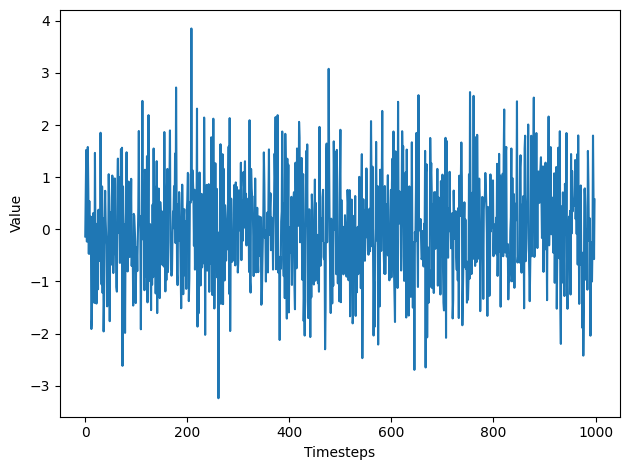

In [9]:
# differencing to make stationary
diff_random_walk = np.diff(random_walk, n=1)

fig, ax = plt.subplots()
ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
# We have removed trend from our series
# Variance is stable

In [11]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistics : {ADF_result[0]}')
print(f'p-value : {ADF_result[1]}')
# We reject H0, and say process has no unit root, thus stationary

ADF Statistics : -31.7893108575606
p-value : 0.0


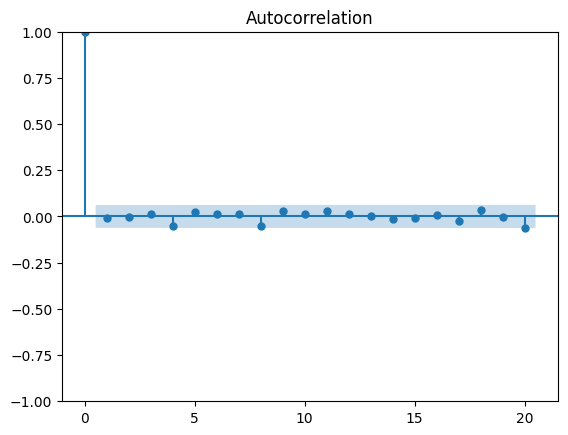

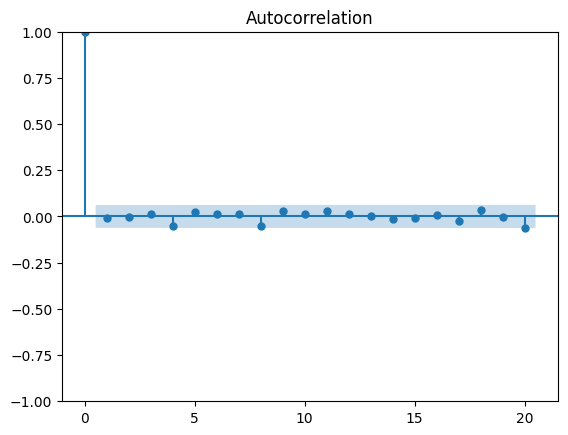

In [13]:
plot_acf(diff_random_walk, lags=20)

# There is no significant autocorrelation coefficient after lag 0
# Stationary process is random and described as white noise